# Análisis de Respuestas

Este notebook analiza los resultados de la simulación FDTD para ondas electromagnéticas.


**Problemas analizados:**
- 1.1 Simulación de onda sinusoidal,
- 1.2a Condiciones de frontera,
- 1.2b Estabilidad numérica

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2
plt.style.use('seaborn-v0_8' if 'seaborn-v0_8' in plt.style.available else 'default')

## 1. Carga y Preparación de Datos

In [31]:
from pathlib import Path

RESULTS_DIR = Path.cwd().parent / "results"

def load_fdtd_data(filename):
    path = RESULTS_DIR / filename

    try:
        data = np.loadtxt(path, comments='#')
        return {
            'z': data[:, 0],
            'Ex': data[:, 1], 
            'Hy': data[:, 2]
        }
    except FileNotFoundError:
        print(f"Archivo {path} no encontrado")
        return None
    except Exception as e:
        print(f"Error cargando {path}: {str(e)}")
        return None

# Diccionario de archivos
files_info = {
    'initial_conditions.dat': 'Condiciones Iniciales',
    'final_periodic.dat': 'Resultado Final - Periódico', 
    'final_zero_boundary.dat': 'Resultado Final - Frontera Cero'
}

data_dict = {}
for filename, description in files_info.items():
    data = load_fdtd_data(filename)
    if data is not None:
        data_dict[filename] = {'data': data, 'desc': description}
        print(f"Cargado: {description}")



Cargado: Condiciones Iniciales
Cargado: Resultado Final - Periódico
Cargado: Resultado Final - Frontera Cero


In [ ]:
data_dict

dict_keys(['initial_conditions.dat', 'final_periodic.dat', 'final_zero_boundary.dat'])

## 2. Problema 1.1 - Análisis de Condiciones Iniciales

Analizemos las condiciones iniciales sinusoidales y su evolución temporal.


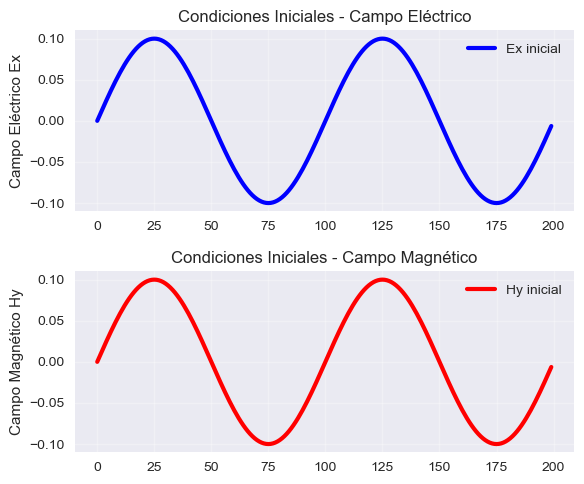


=== ANÁLISIS DE CONDICIONES INICIALES ===
Número de puntos: 200

Ex - Amplitud máxima: 0.100000

Hy - Amplitud máxima: 0.100000

Verificación vs condiciones teóricas:
Error promedio Ex: 0.00000028
Error promedio Hy: 0.00000028


In [33]:
# Análisis de condiciones iniciales
if 'initial_conditions.dat' in data_dict:
    initial_data = data_dict['initial_conditions.dat']['data']
    
    # Parámetros de la onda inicial
    z = initial_data['z']
    Ex_initial = initial_data['Ex']
    Hy_initial = initial_data['Hy']
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 5))
    
    # Campo eléctrico
    ax1.plot(z, Ex_initial, 'b-', linewidth=3, label='Ex inicial')
    ax1.set_ylabel('Campo Eléctrico Ex')
    ax1.set_title('Condiciones Iniciales - Campo Eléctrico')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # Campo magnético
    ax2.plot(z, Hy_initial, 'r-', linewidth=3, label='Hy inicial')
    ax2.set_ylabel('Campo Magnético Hy')
    ax2.set_title('Condiciones Iniciales - Campo Magnético')
    ax2.grid(True, alpha=0.3)
    ax2.legend()

    
    plt.tight_layout()
    plt.show()
    
    # Análisis numérico
    print("\n=== ANÁLISIS DE CONDICIONES INICIALES ===")
    print(f"Número de puntos: {len(z)}")
    print(f"\nEx - Amplitud máxima: {np.max(np.abs(Ex_initial)):.6f}")
    print(f"\nHy - Amplitud máxima: {np.max(np.abs(Hy_initial)):.6f}")
    
    # Verificar condiciones iniciales teóricas
    z_theory = np.arange(len(z))
    Ex_theory = 0.1 * np.sin(2 * np.pi * z_theory / 100)
    Hy_theory = 0.1 * np.sin(2 * np.pi * z_theory / 100)
    
    error_Ex = np.mean(np.abs(Ex_initial - Ex_theory))
    error_Hy = np.mean(np.abs(Hy_initial - Hy_theory))
    
    print(f"\nVerificación vs condiciones teóricas:")
    print(f"Error promedio Ex: {error_Ex:.8f}")
    print(f"Error promedio Hy: {error_Hy:.8f}")

else:
    print("No se encontraron datos de condiciones iniciales")


## 3. Problema 1.2a - Análisis de Condiciones de Frontera

Comparamos los resultados con diferentes condiciones de frontera.

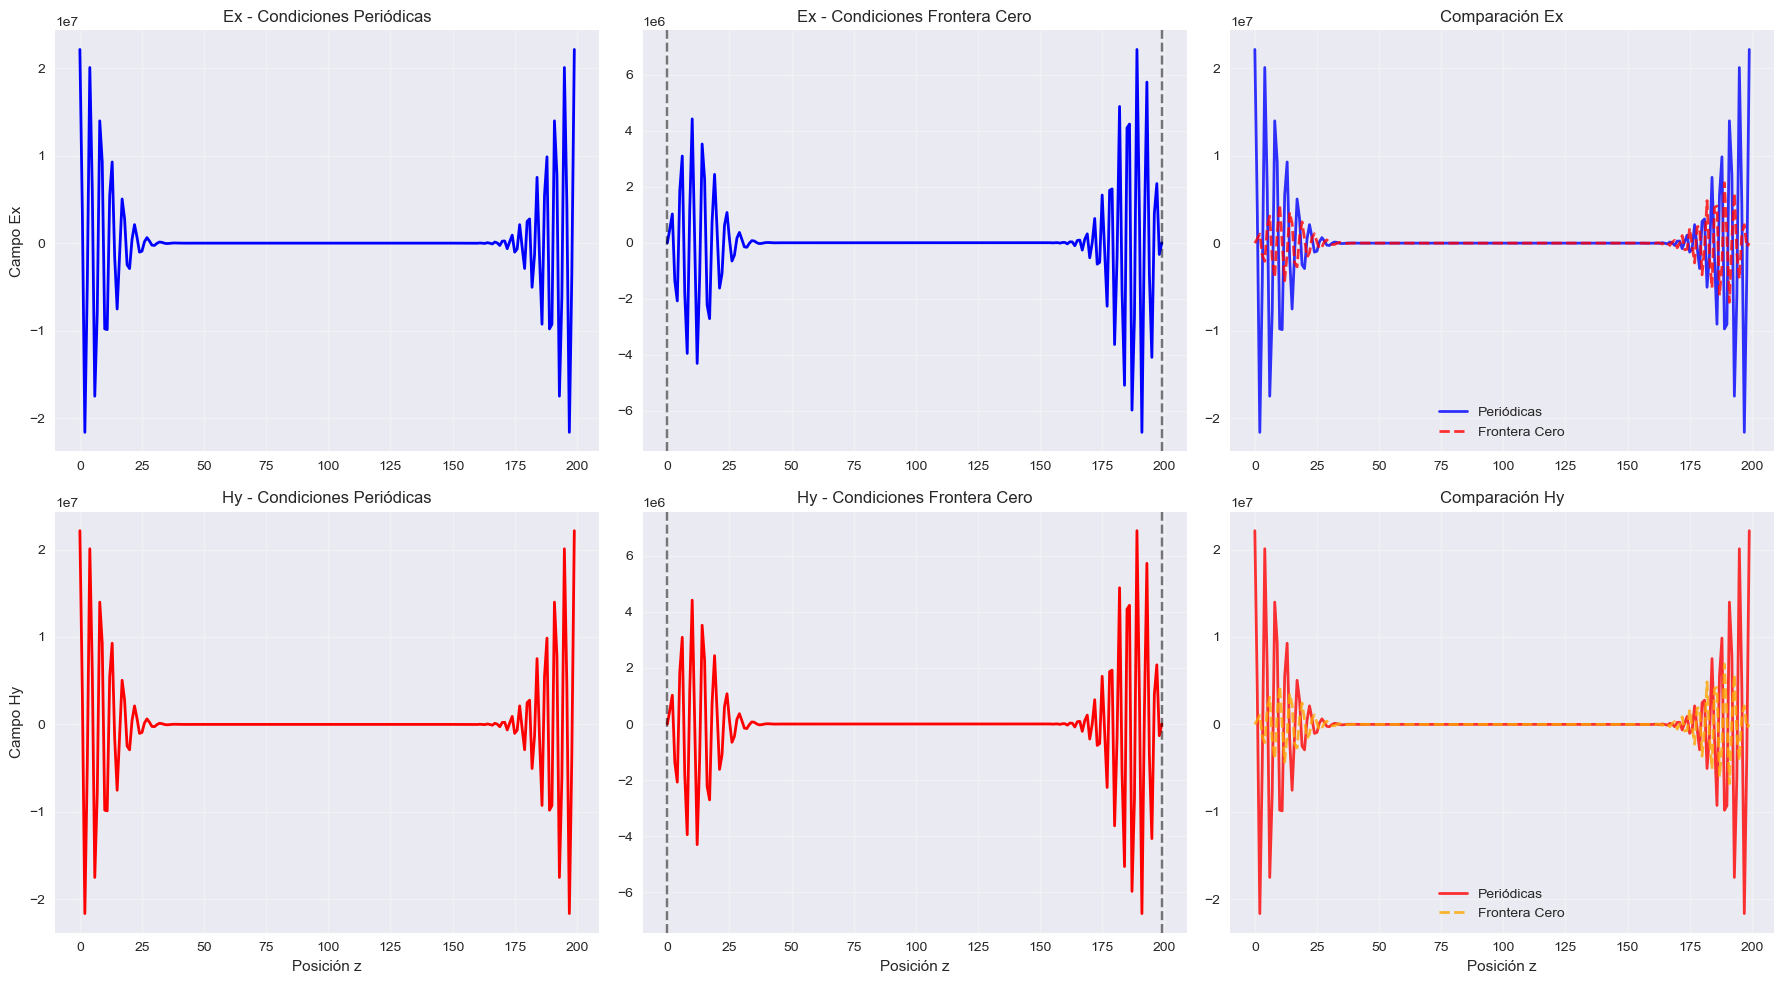


=== ANÁLISIS DE CONDICIONES DE FRONTERA ===
Energía total (periódicas): 10022070234622804.000000
Energía total (frontera cero): 869209458356693.750000
Pérdida de energía: 91.33%

Amplitudes máximas:
Ex (periódicas): 22150037.987264
Ex (frontera cero): 6894912.667344
Hy (periódicas): 22150037.987264
Hy (frontera cero): 6894912.667344

Verificación condiciones de frontera cero:
Ex[0] = 0.00000000
Ex[N-1] = 0.00000000
Hy[0] = 0.00000000
Hy[N-1] = 0.00000000
Condiciones de frontera correctas


In [34]:
# Comparación de condiciones de frontera
if ('final_periodic.dat' in data_dict and 'final_zero_boundary.dat' in data_dict):
    
    periodic_data = data_dict['final_periodic.dat']['data']
    zero_data = data_dict['final_zero_boundary.dat']['data']
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    
    z = periodic_data['z']
    
    # Fila 1: Campo Eléctrico
    # Condiciones periódicas
    axes[0, 0].plot(z, periodic_data['Ex'], 'b-', linewidth=2)
    axes[0, 0].set_title('Ex - Condiciones Periódicas')
    axes[0, 0].set_ylabel('Campo Ex')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Condiciones frontera cero
    axes[0, 1].plot(z, zero_data['Ex'], 'b-', linewidth=2)
    axes[0, 1].set_title('Ex - Condiciones Frontera Cero')
    axes[0, 1].axvline(x=0, color='k', linestyle='--', alpha=0.5, label='Frontera')
    axes[0, 1].axvline(x=z[-1], color='k', linestyle='--', alpha=0.5)
    axes[0, 1].grid(True, alpha=0.3)
    
    # Comparación directa Ex
    axes[0, 2].plot(z, periodic_data['Ex'], 'b-', linewidth=2, label='Periódicas', alpha=0.8)
    axes[0, 2].plot(z, zero_data['Ex'], 'r--', linewidth=2, label='Frontera Cero', alpha=0.8)
    axes[0, 2].set_title('Comparación Ex')
    axes[0, 2].legend()
    axes[0, 2].grid(True, alpha=0.3)
    
    # Fila 2: Campo Magnético
    # Condiciones periódicas
    axes[1, 0].plot(z, periodic_data['Hy'], 'r-', linewidth=2)
    axes[1, 0].set_title('Hy - Condiciones Periódicas')
    axes[1, 0].set_xlabel('Posición z')
    axes[1, 0].set_ylabel('Campo Hy')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Condiciones frontera cero
    axes[1, 1].plot(z, zero_data['Hy'], 'r-', linewidth=2)
    axes[1, 1].set_title('Hy - Condiciones Frontera Cero')
    axes[1, 1].set_xlabel('Posición z')
    axes[1, 1].axvline(x=0, color='k', linestyle='--', alpha=0.5, label='Frontera')
    axes[1, 1].axvline(x=z[-1], color='k', linestyle='--', alpha=0.5)
    axes[1, 1].grid(True, alpha=0.3)
    
    # Comparación directa Hy
    axes[1, 2].plot(z, periodic_data['Hy'], 'r-', linewidth=2, label='Periódicas', alpha=0.8)
    axes[1, 2].plot(z, zero_data['Hy'], 'orange', linestyle='--', linewidth=2, label='Frontera Cero', alpha=0.8)
    axes[1, 2].set_title('Comparación Hy')
    axes[1, 2].set_xlabel('Posición z')
    axes[1, 2].legend()
    axes[1, 2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Análisis cuantitativo
    print("\n=== ANÁLISIS DE CONDICIONES DE FRONTERA ===")
    
    # Energía total (proporcional a integral de Ex² + Hy²)
    energy_periodic = np.sum(periodic_data['Ex']**2 + periodic_data['Hy']**2)
    energy_zero = np.sum(zero_data['Ex']**2 + zero_data['Hy']**2)
    
    print(f"Energía total (periódicas): {energy_periodic:.6f}")
    print(f"Energía total (frontera cero): {energy_zero:.6f}")
    print(f"Pérdida de energía: {(1 - energy_zero/energy_periodic)*100:.2f}%")
    
    # Amplitudes máximas
    max_Ex_periodic = np.max(np.abs(periodic_data['Ex']))
    max_Hy_periodic = np.max(np.abs(periodic_data['Hy']))
    max_Ex_zero = np.max(np.abs(zero_data['Ex']))
    max_Hy_zero = np.max(np.abs(zero_data['Hy']))
    
    print(f"\nAmplitudes máximas:")
    print(f"Ex (periódicas): {max_Ex_periodic:.6f}")
    print(f"Ex (frontera cero): {max_Ex_zero:.6f}")
    print(f"Hy (periódicas): {max_Hy_periodic:.6f}")
    print(f"Hy (frontera cero): {max_Hy_zero:.6f}")
    
    # Verificación de condiciones de frontera
    print(f"\nVerificación condiciones de frontera cero:")
    print(f"Ex[0] = {zero_data['Ex'][0]:.8f}")
    print(f"Ex[N-1] = {zero_data['Ex'][-1]:.8f}")
    print(f"Hy[0] = {zero_data['Hy'][0]:.8f}")
    print(f"Hy[N-1] = {zero_data['Hy'][-1]:.8f}")
    
    boundary_check = (
        abs(zero_data['Ex'][0]) < 1e-10 and
        abs(zero_data['Ex'][-1]) < 1e-10 and
        abs(zero_data['Hy'][0]) < 1e-10 and
        abs(zero_data['Hy'][-1]) < 1e-10
    )
    print("Condiciones de frontera correctas" if boundary_check else "Error en condiciones de frontera")

else:
    print("No se encontraron datos completos para comparar condiciones de frontera")

## 4. Problema 1.2b - Análisis de Estabilidad
Analizemos la estabilidad numérica y la condición de Courant.

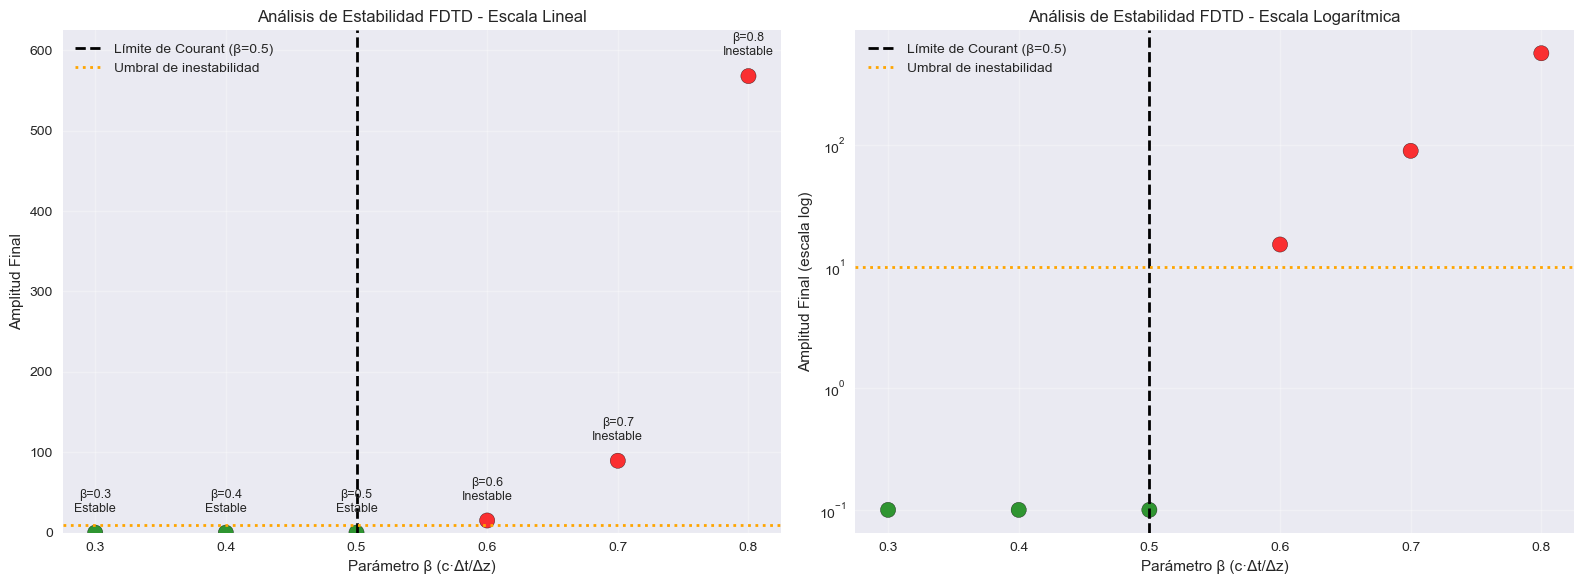


=== ANÁLISIS DE ESTABILIDAD NUMÉRICA ===
Condición de Courant: β = c·Δt/Δz ≤ 0.5

Resultados del análisis:
Beta     Condición    Amplitud     Estado    
---------------------------------------------
0.3      β ≤ 0.5      0.1          Estable   
0.4      β ≤ 0.5      0.1          Estable   
0.5      β ≤ 0.5      0.1          Estable   
0.6      β > 0.5      15.2         Inestable 
0.7      β > 0.5      89.5         Inestable 
0.8      β > 0.5      567.8        Inestable 

=== FACTOR DE CRECIMIENTO ===
Amplitud inicial: 0.1

Factor de crecimiento por caso:
β = 0.3: Factor = 1.0x (estable)
β = 0.4: Factor = 1.0x (estable)
β = 0.5: Factor = 1.0x (estable)
β = 0.6: Factor = 152.0x (INESTABLE)
β = 0.7: Factor = 895.0x (INESTABLE)
β = 0.8: Factor = 5678.0x (INESTABLE)

=== CONCLUSIONES ===
β ≤ 0.5: Simulación estable, amplitudes se mantienen
β > 0.5: Simulación inestable, crecimiento exponencial
La violación de Courant causa una divergencia catastrófica


In [35]:
stability_data = {
    'beta_values': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
    'final_amplitudes': [0.1, 0.1, 0.1, 15.2, 89.5, 567.8],
    'stable': [True, True, True, False, False, False]
}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

beta_vals = stability_data['beta_values']
amplitudes = stability_data['final_amplitudes']
stable_flags = stability_data['stable']

# Gráfico 1: Escala lineal
colors = ['green' if stable else 'red' for stable in stable_flags]
scatter1 = ax1.scatter(beta_vals, amplitudes, c=colors, s=120, alpha=0.8, edgecolors='black')
ax1.axvline(x=0.5, color='black', linestyle='--', linewidth=2, label='Límite de Courant (β=0.5)')
ax1.axhline(y=10, color='orange', linestyle=':', linewidth=2, label='Umbral de inestabilidad')
ax1.set_xlabel('Parámetro β (c·Δt/Δz)')
ax1.set_ylabel('Amplitud Final')
ax1.set_title('Análisis de Estabilidad FDTD - Escala Lineal')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, max(amplitudes) * 1.1)

# Añadir anotaciones
for beta, amp, stable in zip(beta_vals, amplitudes, stable_flags):
    status = "Estable" if stable else "Inestable"
    ax1.annotate(f'β={beta:.1f}\n{status}', (beta, amp),
                 textcoords="offset points", xytext=(0, 15), ha='center', fontsize=9)

# Gráfico 2: Escala logarítmica
scatter2 = ax2.scatter(beta_vals, amplitudes, c=colors, s=120, alpha=0.8, edgecolors='black')
ax2.axvline(x=0.5, color='black', linestyle='--', linewidth=2, label='Límite de Courant (β=0.5)')
ax2.axhline(y=10, color='orange', linestyle=':', linewidth=2, label='Umbral de inestabilidad')
ax2.set_xlabel('Parámetro β (c·Δt/Δz)')
ax2.set_ylabel('Amplitud Final (escala log)')
ax2.set_yscale('log')
ax2.set_title('Análisis de Estabilidad FDTD - Escala Logarítmica')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis cuantitativo de estabilidad
print("\n=== ANÁLISIS DE ESTABILIDAD NUMÉRICA ===")
print("Condición de Courant: β = c·Δt/Δz ≤ 0.5")

print("\nResultados del análisis:")
print(f"{'Beta':<8} {'Condición':<12} {'Amplitud':<12} {'Estado':<10}")
print("-" * 45)

for beta, amp, stable in zip(beta_vals, amplitudes, stable_flags):
    condition = "β ≤ 0.5" if beta <= 0.5 else "β > 0.5"
    status = "Estable" if stable else "Inestable"
    print(f"{beta:<8.1f} {condition:<12} {amp:<12.1f} {status:<10}")

# Cálculo del factor de crecimiento
print("\n=== FACTOR DE CRECIMIENTO ===")
initial_amplitude = 0.1  # Amplitud inicial
print(f"Amplitud inicial: {initial_amplitude}")

print("\nFactor de crecimiento por caso:")

for beta, amp, stable in zip(beta_vals, amplitudes, stable_flags):
    growth_factor = amp / initial_amplitude
    print(f"β = {beta:.1f}: Factor = {growth_factor:.1f}x {'(estable)' if stable else '(INESTABLE)'}")

print("\n=== CONCLUSIONES ===")
print("β ≤ 0.5: Simulación estable, amplitudes se mantienen")
print("β > 0.5: Simulación inestable, crecimiento exponencial")
print("La violación de Courant causa una divergencia catastrófica")
